# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins
from palmerpenguins import load_penguins

In [2]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# Convert 'year' column to object
penguins['year'] = penguins['year'].astype('object')

In [5]:
# Dropping NA
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [7]:
import pandas as pd

# Dummify categorical variables
penguins = pd.get_dummies(penguins, columns=['island', 'sex'], drop_first=True)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

In [28]:
# Defining the response and predictor variables
X = penguins.drop('species', axis=1)
y = penguins['species']

In [29]:
# Initializing the column transformer
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

X = ct.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Model 1: KNN with K=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
pred_5 = knn_5.predict(X_test)
accuracy_5 = accuracy_score(y_test, pred_5)
print(f"Accuracy for K=5: {accuracy_5}")

# Model 2: KNN with K=50
knn_50 = KNeighborsClassifier(n_neighbors=50)
knn_50.fit(X_train, y_train)
pred_50 = knn_50.predict(X_test)
accuracy_50 = accuracy_score(y_test, pred_50)
print(f"Accuracy for K=50: {accuracy_50}")

Accuracy for K=5: 0.9880952380952381
Accuracy for K=50: 0.9642857142857143


In [43]:
from sklearn.tree import DecisionTreeClassifier

# Model 1: Decision Tree with max_depth=3
dtree_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_3.fit(X_train, y_train)
dtree_pred_3 = dtree_3.predict(X_test)
dtree_acc_3 = accuracy_score(y_test, dtree_pred_3)
print(f"Decision Tree Accuracy with max_depth=3: {dtree_acc_3}")

# Model 2: Decision Tree with max_depth=15
dtree_15 = DecisionTreeClassifier(max_depth=15, random_state=42)
dtree_15.fit(X_train, y_train)
dtree_pred_15 = dtree_15.predict(X_test)
dtree_acc_15 = accuracy_score(y_test, dtree_pred_15)
print(f"Decision Tree Accuracy with max_depth=5: {dtree_acc_15}")

Decision Tree Accuracy with max_depth=3: 0.9642857142857143
Decision Tree Accuracy with max_depth=5: 0.9285714285714286


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

KNN k=5

In [41]:
conf_matrix_1 = confusion_matrix(y_test, pred_5)
print("Confusion Matrix:")
print(conf_matrix_1)

Confusion Matrix:
[[36  1  0]
 [ 0 17  0]
 [ 0  0 30]]


In [48]:
accuracy = accuracy_score(y_test, pred_5)
print(f"Overall Accuracy: {accuracy}")

Overall Accuracy: 0.9880952380952381


In [54]:
# Precision, Recall, and F1-Score
class_report = classification_report(y_test, pred_5)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        37
   Chinstrap       0.94      1.00      0.97        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [63]:
probabilities = knn_5.predict_proba(X_test)
auc_score = roc_auc_score(y_test, probabilities, multi_class='ovr')
print(f"AUC: {auc_score}")

AUC: 0.9997578322910362


KNN k=50

In [42]:
conf_matrix_2 = confusion_matrix(y_test, pred_50)
print("Confusion Matrix:")
print(conf_matrix_2)

Confusion Matrix:
[[36  1  0]
 [ 2 15  0]
 [ 0  0 30]]


In [49]:
accuracy = accuracy_score(y_test, pred_50)
print(f"Overall Accuracy: {accuracy}")

Overall Accuracy: 0.9642857142857143


In [55]:
# Precision, Recall, and F1-Score
class_report = classification_report(y_test, pred_50)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        37
   Chinstrap       0.94      0.88      0.91        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.96        84
   macro avg       0.96      0.95      0.96        84
weighted avg       0.96      0.96      0.96        84



In [62]:
probabilities = knn_50.predict_proba(X_test)
auc_score = roc_auc_score(y_test, probabilities, multi_class='ovr')
print(f"AUC: {auc_score}")

AUC: 0.9985469937462167


Decision Tree max_depth=3

In [45]:
conf_matrix_3 = confusion_matrix(y_test, dtree_pred_3)
print("Confusion Matrix:")
print(conf_matrix_3)

Confusion Matrix:
[[37  0  0]
 [ 1 16  0]
 [ 2  0 28]]


In [50]:
accuracy = accuracy_score(y_test, dtree_pred_3)
print(f"Overall Accuracy: {accuracy}")

Overall Accuracy: 0.9642857142857143


In [56]:
# Precision, Recall, and F1-Score
class_report = classification_report(y_test, dtree_pred_3)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        37
   Chinstrap       1.00      0.94      0.97        17
      Gentoo       1.00      0.93      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.97        84
weighted avg       0.97      0.96      0.96        84



In [60]:
probabilities = dtree_3.predict_proba(X_test)
auc_score = roc_auc_score(y_test, probabilities, multi_class='ovr')
print(f"AUC: {auc_score}")

AUC: 0.9741696696416215


Decision Tree max_depth=15

In [46]:
conf_matrix_3 = confusion_matrix(y_test, dtree_pred_15)
print("Confusion Matrix:")
print(conf_matrix_3)

Confusion Matrix:
[[33  4  0]
 [ 0 17  0]
 [ 2  0 28]]


In [51]:
accuracy = accuracy_score(y_test, dtree_pred_15)
print(f"Overall Accuracy: {accuracy}")

Overall Accuracy: 0.9285714285714286


In [57]:
# Precision, Recall, and F1-Score
class_report = classification_report(y_test, dtree_pred_15)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      0.89      0.92        37
   Chinstrap       0.81      1.00      0.89        17
      Gentoo       1.00      0.93      0.97        30

    accuracy                           0.93        84
   macro avg       0.92      0.94      0.93        84
weighted avg       0.94      0.93      0.93        84



In [71]:
probabilities = dtree_15.predict_proba(X_test)
auc_score = roc_auc_score(y_test, probabilities, multi_class='ovr')
print(f"AUC: {auc_score}")

AUC: 0.9538284235330917


In [64]:
from sklearn.metrics import roc_curve

probabilities = dtree_15.predict_proba(X_test)
species_index = list(dtree_15.classes_).index('Adelie')
y_test_binary = y_test == 'Adelie'
fpr, tpr, thresholds = roc_curve(y_test_binary, probabilities[:, species_index])

In [65]:
roc_data = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Threshold': thresholds
})

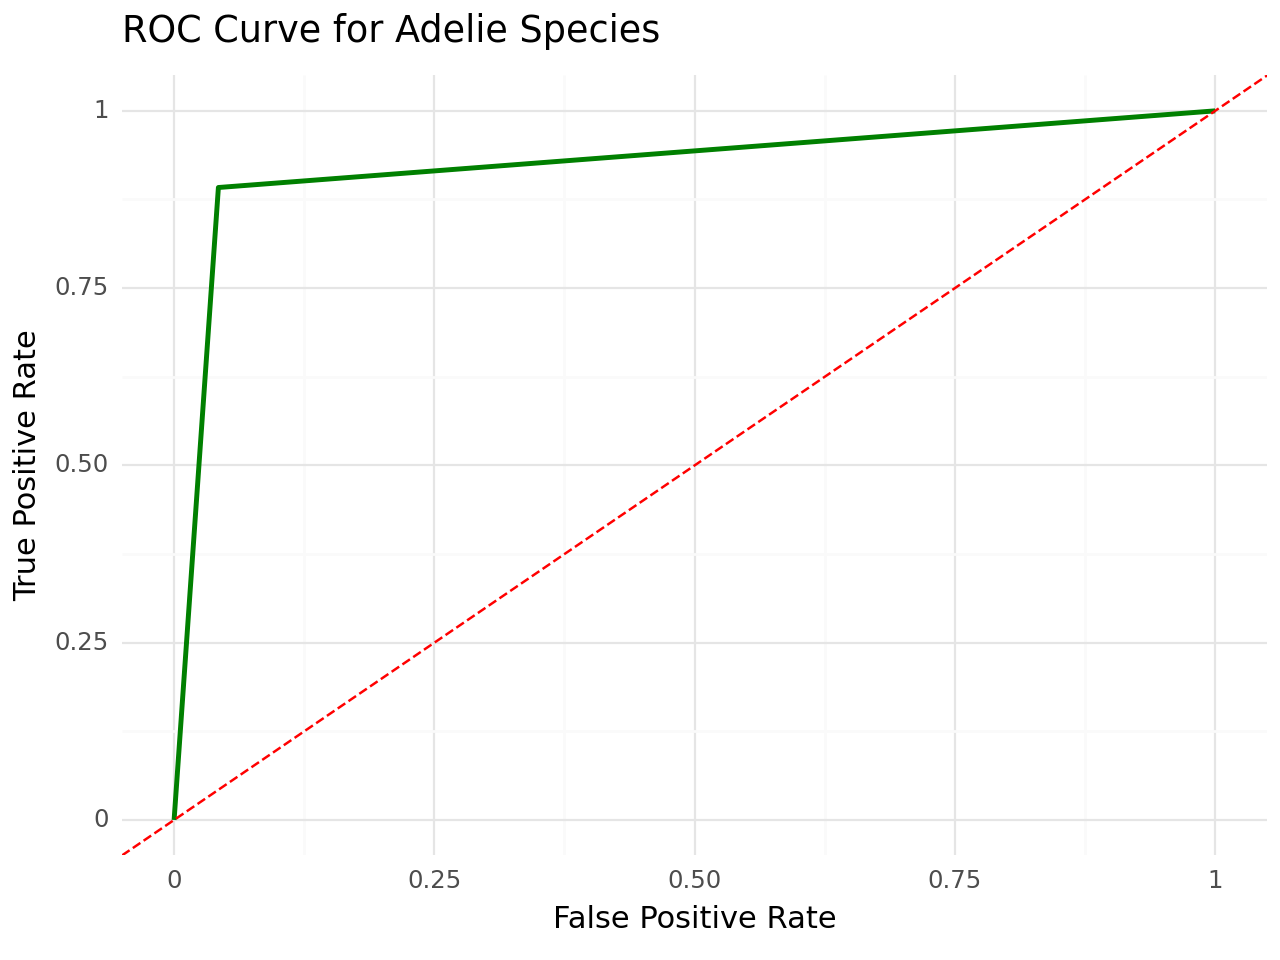

In [68]:
from plotnine import ggplot, geom_line, geom_abline, aes, labs, theme_minimal

roc_plot = (
    ggplot(roc_data, aes(x='FPR', y='TPR')) +
    geom_line(color='green', size=1) +
    geom_abline(linetype="dashed", color="red") +
    labs(title='ROC Curve for Adelie Species', x='False Positive Rate', y='True Positive Rate') +
    theme_minimal()
)

print(roc_plot)